This notebook contains code for performing the designing of CNN architecture.

In [2]:
# Import the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import time
from tqdm import tqdm

In [3]:
# Set random seed for Python's built-in random number generator
import random
random_seed = 42
random.seed(random_seed)

# Set random seed for NumPy
np.random.seed(random_seed)

# Set random seed for TensorFlow
tf.random.set_seed(random_seed)

In [4]:
# Check for configuration of available GPU devices
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1699242108910327839
 xla_global_id: -1]

In [7]:
DATADIR = 'C:\\Users\\moaz\\Desktop\\uia pdf\\IKT459-G-25V_Embedded_Sensors_Signal_Processing_and_Machine_Learning_for_Autonomous_Systems\\project_materials\\trening_data'

CATEGORIES = ["food_good","food_bad"]
dataset = []
img_size = (224,224)
for category in tqdm(CATEGORIES):
		path = os.path.join(DATADIR,category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
				image_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
				new_array = cv2.resize(image_rgb, img_size)
				dataset.append([new_array, class_num])
			except Exception as e:
				pass


X = [] #features
Y = [] #labels

for features, label in dataset:
	X.append(features)
	Y.append(label)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:22<00:00, 41.32s/it]


In [ ]:
X_test.shape

In [8]:

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

# Convert to numpy array and reshape into image format
X_train = np.array(X_train).reshape(-1, img_size[0], img_size[1], 3)
Y_train = np.array(Y_train).reshape(-1,)

X_test = np.array(X_test).reshape(-1, img_size[0], img_size[1], 3)
Y_test = np.array(Y_test).reshape(-1,)

# May require normalization of pixel values 
#X_train = (X_train)/255
#X_test = (X_test)/255

# ---------------------- RESNET BUILDING BLOCKS ----------------------------------------------------
def res_net_block(input_data, filters, conv_size):
    #x = layers.Rescaling(scale=1.0 / 255)(input_data)
    x = layers.Conv2D(filters, conv_size, activation='swish', padding='same')(input_data)
    #x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    #x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    #x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('swish')(x)
    
    return x
    
# Custom Model construction
#-----------------------------------------------------------------------------------------------------
def createModel(img_size):
    # Model construction

    kernelSize = (8,8)
    maxpoolSize = (6,6)
       
    inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv2D(16, kernelSize, padding='same', activation='relu6')(x)
    #x = layers.Dropout(0.4)(x)
    #x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    
    num_res_net_blocks = 1
    for i in range(num_res_net_blocks):
        x = res_net_block(x, 16, 8)
    
    x = layers.Conv2D(32, kernelSize, padding='same', activation='relu6')(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    #x = layers.Dropout(0.2)(x)    
    x = layers.Conv2D(64, kernelSize, padding='same', activation='relu6')(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)

    outputs = layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

# Early stopping

# Create the model
img_size = (224, 224)  # Update this based on your image size

model = createModel(img_size)



In [26]:
from tensorflow.keras import layers, regularizers
# ---------------------- RESNET BUILDING BLOCKS ----------------------------------------------------
def res_net_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='swish', padding='same')(input_data)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('swish')(x)
    
    return x
# Custom Model construction
#-----------------------------------------------------------------------------------------------------
def createModel(img_size):
    # Model construction

    kernelSize = (8,8)
    maxpoolSize = (6,6)
       
    inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv2D(16, kernelSize, padding='same', activation='relu6')(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    
    num_res_net_blocks = 1
    for i in range(num_res_net_blocks):
        x = res_net_block(x, 16, 8)
    
    x = layers.Conv2D(32, kernelSize, padding='same', activation='relu6')(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    x = layers.Conv2D(64, kernelSize, padding='same', activation='relu6')(x)
    x = layers.MaxPooling2D(pool_size = maxpoolSize, strides=None)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

# Early stopping

# Create the model
img_size = (224, 224)  # Update this based on your image size

model = createModel(img_size)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 224, 224, 3)       │              12 │ input_layer_1[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 224, 224, 16)      │           3,088 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 37, 37, 16)        │               0 │ conv2d_6[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 37, 37, 16)        │          16,400 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 37, 37, 16)        │          16,400 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 37, 37, 16)        │          16,400 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 37, 37, 16)        │               0 │ conv2d_9[0][0],            │
│                               │                           │                 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 37, 37, 16)        │               0 │ add_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 37, 37, 32)        │          32,800 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 6, 6, 32)          │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_11 (Conv2D)            │ (None, 6, 6, 64)          │         131,136 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 1, 1, 64)          │               0 │ conv2d_11[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 64)                │               0 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │              6

 Total params: 216,301 (844.93 KB)

 Trainable params: 216,295 (844.90 KB)

 Non-trainable params: 6 (24.00 B)

In [27]:
# Model compile
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Model fit/train
history = model.fit(X_train, Y_train, epochs=40, shuffle = True, batch_size=64, validation_split= 0.1)

Epoch 1/40


C:\Users\moaz\IKT466_PRJECT_ENV\lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.4994 - loss: 0.5137 - val_accuracy: 0.5444 - val_loss: 4.3705
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 346ms/step - accuracy: 0.4994 - loss: 0.0398 - val_accuracy: 0.5444 - val_loss: 5.4929
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.4994 - loss: 0.0799 - val_accuracy: 0.5444 - val_loss: 2.0565
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.4994 - loss: 0.0124 - val_accuracy: 0.5444 - val_loss: 0.2556
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.4994 - loss: 0.0026 - val_accuracy: 0.5444 - val_loss: 0.3083
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.4994 - loss: 0.0017 - val_accuracy: 0.5444 - val_loss: 0.1841
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.4994 - loss: 4.3982e-04 - val_accuracy: 0.5444 - val_loss: 0.1595
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.4994 - loss: 3.2699e-04 - val_accuracy: 0.544

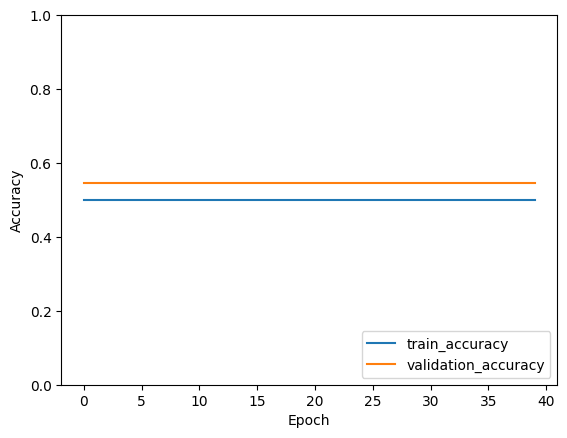

In [29]:
# Accuracy curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('C:\\Users\\moaz\\Desktop\\uia pdf\\IKT459-G-25V_Embedded_Sensors_Signal_Processing_and_Machine_Learning_for_Autonomous_Systems\\project_materials\\trening_data\\accuracy.png',facecolor='white')
plt.show()

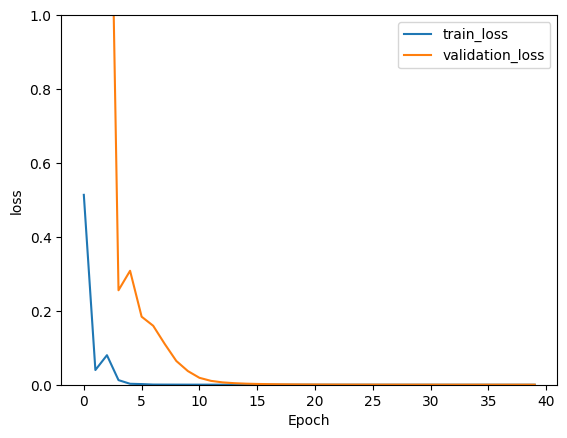

In [30]:
# Loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.savefig('C:\\Users\\moaz\\Desktop\\uia pdf\\IKT459-G-25V_Embedded_Sensors_Signal_Processing_and_Machine_Learning_for_Autonomous_Systems\\project_materials\\trening_data\\loss.png',facecolor='white')
plt.show()

In [31]:
# Calculate the desired metrics
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Model prediction provides probabilities of the input class
# Based on the probabilities the corresponding class category is determined.
Y_te = np.array(tf.math.argmax(model.predict(X_test),1))

# Calculate the accuracy metrics
acc = metrics.accuracy_score(Y_test, Y_te)

# Classification metrics and report
classReport = classification_report(Y_test, Y_te)

# Print and save all the metrics
print("test_accuracy:", acc*100, "\n")
print("test_loss:", test_loss, "\n") 
print(classReport)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4600 - loss: 3.1403e-04
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 

C:\Users\moaz\IKT466_PRJECT_ENV\lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
test_accuracy: 54.0 

test_loss: 0.00031403402681462467 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        54
           1       0.00      0.00      0.00        46

    accuracy                           0.54       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.29      0.54      0.38       100



C:\Users\moaz\IKT466_PRJECT_ENV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moaz\IKT466_PRJECT_ENV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\moaz\IKT466_PRJECT_ENV\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [32]:
# Plot the confusion matrix
con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["Rain","Ocean Waves","Burning Fire","Bee","Bird","Wind","Pour water","Water flushing","Thunderstorm"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(7,5))
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
#plt.title('Convolution Neural Newtork')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
#plt.savefig(resultsStore+modelName+'/confusionMatrix.png',facecolor='white')
plt.show()

ValueError: Shape of passed values is (2, 2), indices imply (9, 9)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 3)          12        ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 16)         3088      ['batch_normalization[0][0]'] 
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 37, 37, 16)           0         ['conv2d[0][0]']          

In [14]:
model.save('/home/pardhasarb/Rakesh/neha.h5') 